In [10]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from IPython.display import Image
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
math_data = pd.read_csv('student-mat.csv') #importing data
math_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [28]:
y = math_data.G3 # using G3 as the predicted variable
X = math_data.drop(['G1', 'G2', 'G3', 'school', 'address'], axis=1)

In [4]:
#Identify target variable y and predictor variables X.
ym = math_data['G3']
Xm = math_data[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences']]
#Convert dummy variables values into 0/1.
Xm.school = Xm['school'].replace(['GP', 'MS'], [1,0])
Xm.sex = Xm['sex'].replace(['F','M'],[1,0])
Xm.address = Xm['address'].replace(['U','R'], [1,0])
Xm.famsize = Xm['famsize'].replace(['LE3','GT3'], [1,0])
Xm.Pstatus = Xm['Pstatus'].replace(['T','A'], [1,0])
Xm.schoolsup = Xm['schoolsup'].replace(['yes','no'],[1,0])
Xm.famsup = Xm['famsup'].replace(['yes','no'],[1,0])
Xm.activities = Xm['activities'].replace(['yes','no'],[1,0])
Xm.nursery = Xm['nursery'].replace(['yes','no'],[1,0])
Xm.higher = Xm['higher'].replace(['yes','no'],[1,0])
Xm.internet = Xm['internet'].replace(['yes','no'],[1,0])
Xm.romantic = Xm['romantic'].replace(['yes','no'],[1,0])
#Identify nominal variables
norminal_vars = ['Fjob', 'Mjob', 'reason','guardian']
#Convert norminal variables to dummy variables
Xm = pd.get_dummies(Xm, columns= norminal_vars, drop_first=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [29]:
#data transform
def scale (X):
    ### non scaled dataframe X --> scaled dataframe X
    #seperate dummy varialbes and nondummy variables for X_train and X_test
    X_nondummy = X[['Fedu', 'Medu', 'absences',  'age',
       'failures', 'famrel', 'freetime', 'goout',
       'health', 'studytime', 'traveltime']]
    X_dummy = X[['Pstatus','activities', 'address','famsize', 'famsup','higher', 'internet', 'nursery', 'romantic', 'school',
       'schoolsup', 'sex', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other']]
    #select scaler
    scaler = MinMaxScaler()
    #scale nondummy variables
    scaler.fit(X_nondummy)
    X_nondummy_scaled = scaler.transform(X_nondummy)
    #concatenate scaled nondummy with nonscaled dummy variables
    X_scaled = np.concatenate((X_nondummy_scaled, X_dummy.values), axis=1)
    return X_scaled

In [30]:
gradenew = np.where(math_data['G3'] <= 10, 0, 1)
gradenew

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [31]:
X_train, X_test, y_train, y_test = train_test_split(Xm, gradenew, test_size = 0.3, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

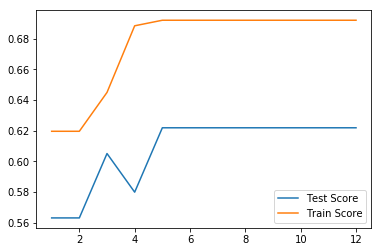

In [33]:

depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]#, 13, 14, 15, 16, 17, 18]
scores_test = []
scores_train = []

for i in range(0, len(depths)):
    dtree = DecisionTreeClassifier(max_depth = depths[i], min_samples_split = 50, min_samples_leaf = 20, random_state = 245) # minimum 50 samples required to split the node
    dtree = dtree.fit(X_train, y_train)
    scores_test.append(dtree.score(X_test, y_test))
    scores_train.append(dtree.score(X_train, y_train))

plt.plot(depths, scores_test)
plt.plot(depths, scores_train)
plt.legend(['Test Score', 'Train Score'])